# YOLOv8 – Détection de plaques d'immatriculation (VS Code + Roboflow)

Notebook **simplifié** pour tourner en local dans **Visual Studio Code** avec un dataset Roboflow.

## 0. Vérifier le Python utilisé par Jupyter

In [1]:
import sys
print('Python utilisé par Jupyter :', sys.executable)

Python utilisé par Jupyter : c:\Users\vassi\AppData\Local\Programs\Python\Python311\python.exe


## 1. Installer les bibliothèques nécessaires

Installe **ultralytics** (YOLOv8) et **roboflow** dans le même environnement Python que Jupyter.

In [2]:
import sys
!{sys.executable} -m pip install ultralytics roboflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Importer YOLOv8 et Roboflow

In [3]:
from ultralytics import YOLO
from roboflow import Roboflow

import ultralytics, roboflow
print('Ultralytics version :', ultralytics.__version__)
print('Roboflow version   :', roboflow.__version__)

Ultralytics version : 8.3.191
Roboflow version   : 1.2.11


## 3. Télécharger le dataset de plaques depuis Roboflow

In [4]:
# 👉 À MODIFIER avec tes propres informations Roboflow
RF_API_KEY = 'KlFHdjBz8nJBPJxowMRR'
WORKSPACE = 'moin'
PROJECT_NAME = 'car_license_plates'
VERSION_NUMBER = 1

rf = Roboflow(api_key=RF_API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT_NAME)
dataset = project.version(VERSION_NUMBER).download('yolov8')

print('Dataset téléchargé dans :', dataset.location)
print('Fichier data.yaml      :', dataset.location + '/data.yaml')

loading Roboflow workspace...
loading Roboflow project...
Dataset téléchargé dans : c:\Users\vassi\yolo_exp\Car_License_Plates-1
Fichier data.yaml      : c:\Users\vassi\yolo_exp\Car_License_Plates-1/data.yaml


## 4. Charger un modèle YOLOv8 pré-entraîné

In [5]:
model = YOLO('yolov8n.pt')
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

## 5. Entraîner YOLOv8 sur le dataset de plaques

In [ ]:
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=5,
    imgsz=640,
    project='runs',
    name='lp-yolov8n',
    exist_ok=True,
)

New https://pypi.org/project/ultralytics/8.3.230 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.191  Python-3.11.0 torch-2.8.0+cpu CPU (unknown)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\vassi\yolo_exp\Car_License_Plates-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=lp-yolov8n, nbs=64, nms=False, opset=None, opti

## 6. Évaluer rapidement le modèle entraîné

In [ ]:
val_results = model.val(data=f"{dataset.location}/data.yaml")

Ultralytics 8.3.191  Python-3.11.0 torch-2.8.0+cpu CPU (unknown)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 383.445.1 MB/s, size: 41.8 KB)
val: Scanning C:\Users\vassi\yolo_exp\Car_License_Plates-1\valid\labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 64/64  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.60it/s 6.7s2.6ss
                   all         64         68      0.794      0.676      0.769       0.42
Speed: 2.4ms preprocess, 87.4ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs\lp-yolov8n


## 7. Lancer la détection sur les images de test

In [ ]:
test_images_dir = f"{dataset.location}/test/images"

pred_results = model.predict(
    source=test_images_dir,
    conf=0.25,
    project='runs',
    name='lp-yolov8n-test',
    save=True,
    exist_ok=True,
)

print('Prédictions terminées.')


image 1/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars102_png.rf.2f7df8720decb1a7033ebbbeb8dfc5be.jpg: 640x640 5 licences, 73.0ms
image 2/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars121_png.rf.144e2406a55f094f4431cf016c16eb00.jpg: 640x640 1 licence, 58.7ms
image 3/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars125_png.rf.34e3433878729077aa43f0e2bbb18029.jpg: 640x640 1 licence, 64.7ms
image 4/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg: 640x640 1 licence, 65.4ms
image 5/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars142_png.rf.887a9c849ad9a6f089bcafb3a1c0315f.jpg: 640x640 1 licence, 63.1ms
image 6/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars151_png.rf.c47a70b9ea8e7f2de37e1b7dbbec518a.jpg: 640x640 1 licence, 58.6ms
image 7/30 c:\Users\vassi\yolo_exp\Car_License_Plates-1\test\images\Cars155_png.rf.cfbba229e66c90e5c56326c6f2628838.

## 8. Afficher quelques images annotées

Dossier de prédiction : c:\Users\vassi\yolo_exp\runs\lp-yolov8n-test
Nombre d'images trouvées : 30

Affichage de quelques exemples :
 - runs\lp-yolov8n-test\Cars102_png.rf.2f7df8720decb1a7033ebbbeb8dfc5be.jpg


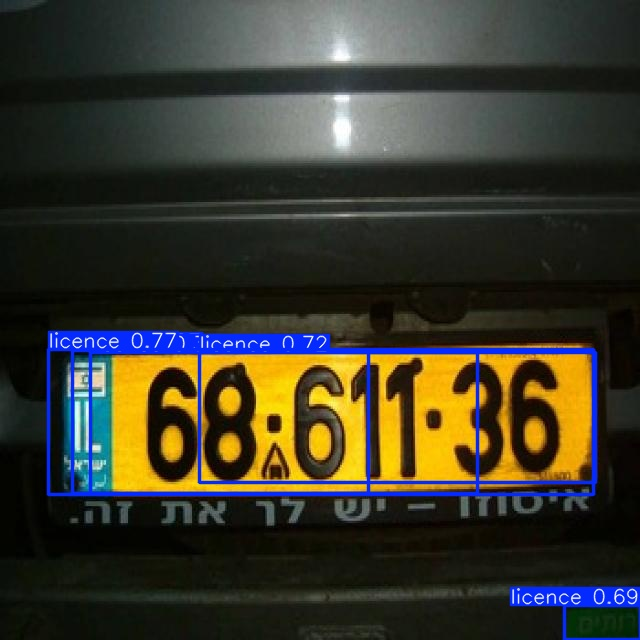

 - runs\lp-yolov8n-test\Cars121_png.rf.144e2406a55f094f4431cf016c16eb00.jpg


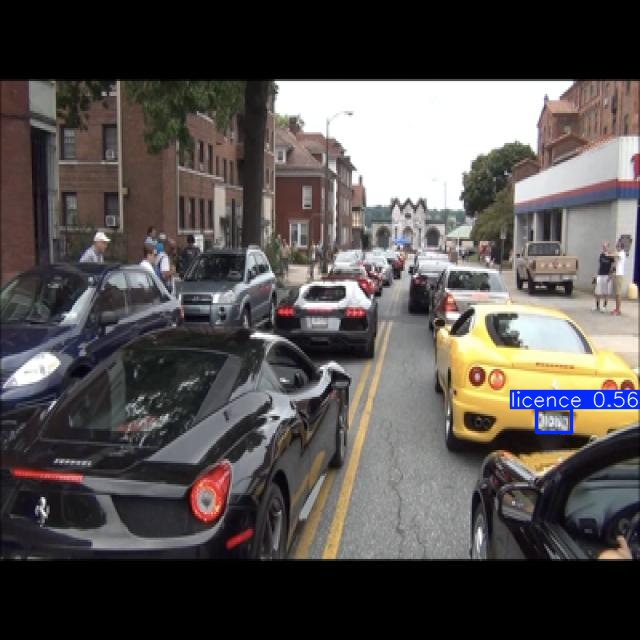

 - runs\lp-yolov8n-test\Cars125_png.rf.34e3433878729077aa43f0e2bbb18029.jpg


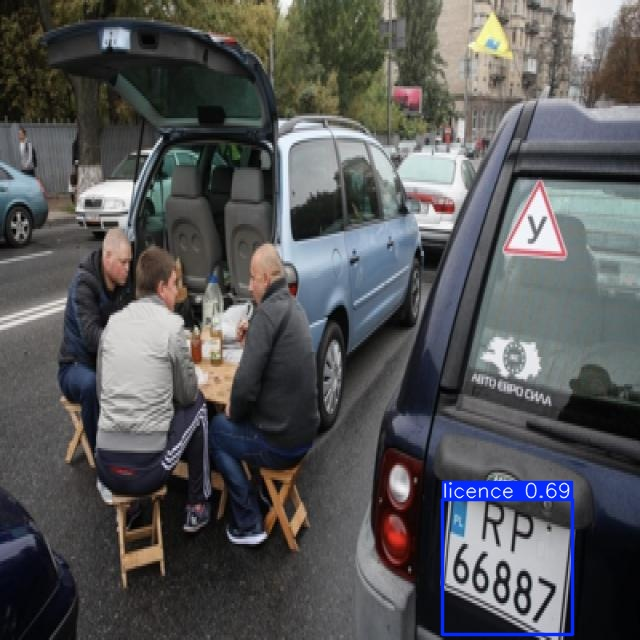

 - runs\lp-yolov8n-test\Cars129_png.rf.881823a221699ef0677915cea761bdbf.jpg


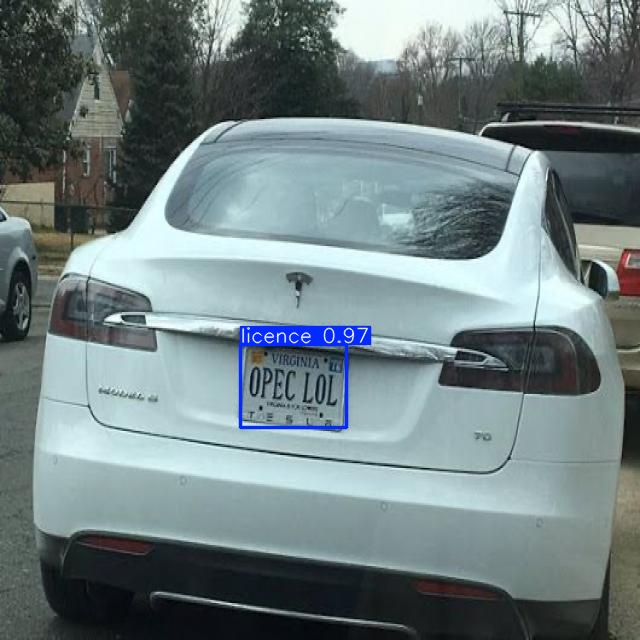

 - runs\lp-yolov8n-test\Cars142_png.rf.887a9c849ad9a6f089bcafb3a1c0315f.jpg


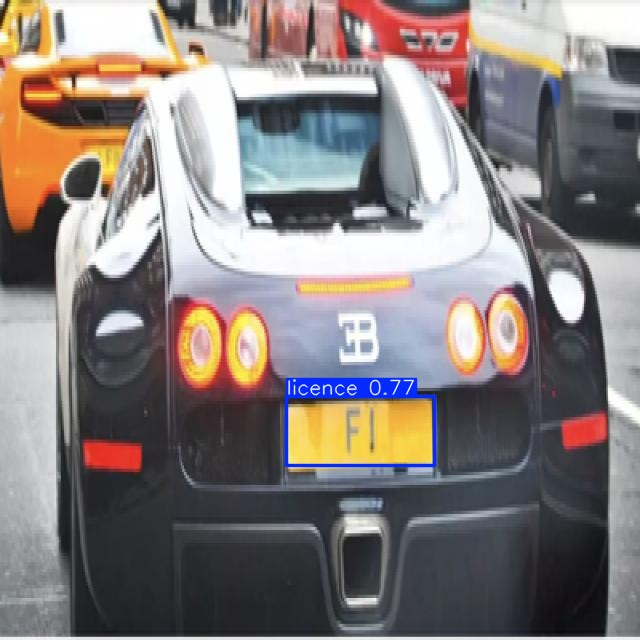

In [ ]:
import os, glob
from IPython.display import Image, display

results_dir = os.path.join("runs", "lp-yolov8n-test")
print("Dossier de prédiction :", os.path.abspath(results_dir))

if not os.path.isdir(results_dir):
    print("⚠️ Dossier introuvable : exécute la cellule 7 (prédiction).")
else:
    files = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        files.extend(glob.glob(os.path.join(results_dir, ext)))

    print("Nombre d'images trouvées :", len(files))

    if not files:
        print("⚠️ Aucune image trouvée dans le dossier de prédiction.")
    else:
        print("\nAffichage de quelques exemples :")
        for img_path in files[:5]:
            print(" -", img_path)
            display(Image(img_path))


## 9. (Optionnel) Tester une image personnelle

In [3]:
from ultralytics import YOLO

# Charge ton modèle entraîné (best.pt)
model = YOLO("runs/lp-yolov8n/weights/best.pt")
print("Modèle chargé.")


Modèle chargé.



image 1/1 c:\Users\vassi\yolo_exp\mon_image.jpg: 384x640 1 licence, 47.0ms
Speed: 1.8ms preprocess, 47.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\lp-yolov8n-custom
Image annotée : runs\lp-yolov8n-custom\mon_image.jpg


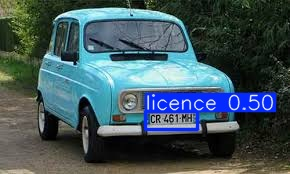

In [17]:
from IPython.display import Image as IPyImage, display as ipy_display
import glob, os

# Chemin de ton image perso (placée dans C:\Users\vassi\yolo_exp)
image_path = 'mon_image.jpg'  # ou 'mon_image1.jpg' si c'est celui-là

custom_results = model.predict(
    source=image_path,
    conf=0.25,
    project='runs',
    name='lp-yolov8n-custom',
    save=True,
    exist_ok=True,
)

# YOLOv8 enregistre l'image annotée dans runs/lp-yolov8n-custom
out_dir = os.path.join('runs', 'lp-yolov8n-custom')
annotated = []
for ext in ('*.jpg', '*.jpeg', '*.png'):
    annotated.extend(glob.glob(os.path.join(out_dir, ext)))

if annotated:
    print('Image annotée :', annotated[0])
    ipy_display(IPyImage(annotated[0]))
else:
    print("⚠️ Aucune image annotée trouvée (vérifie que l'image d'entrée existe et que le modèle a bien tourné).")
    
